In [1]:
import numpy as np

# Define two matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Matrix Addition
addition_result = A + B

# Matrix Subtraction
subtraction_result = A - B

# Matrix Multiplication (Element-wise)
multiplication_result = A * B

# Matrix Multiplication (Dot Product)
dot_product_result = np.dot(A, B)

# Display results
print("Matrix A:\n", A)
print("Matrix B:\n", B)

print("\nMatrix Addition:\n", addition_result)
print("\nMatrix Subtraction:\n", subtraction_result)
print("\nElement-wise Multiplication:\n", multiplication_result)
print("\nDot Product Multiplication:\n", dot_product_result)

Matrix A:
 [[1 2]
 [3 4]]
Matrix B:
 [[5 6]
 [7 8]]

Matrix Addition:
 [[ 6  8]
 [10 12]]

Matrix Subtraction:
 [[-4 -4]
 [-4 -4]]

Element-wise Multiplication:
 [[ 5 12]
 [21 32]]

Dot Product Multiplication:
 [[19 22]
 [43 50]]


web scraping using `BeautifulSoup`.

In [2]:
%pip install requests beautifulsoup4

Now, we can use `requests` to fetch the web page and `BeautifulSoup` to parse and extract data.

In [3]:
import requests
from bs4 import BeautifulSoup

url = "https://example.com" # Replace with the URL you want to scrape
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    paragraphs = soup.find_all("p")

    for i, p in enumerate(paragraphs, 1):
        print(f"Paragraph {i}: {p.get_text()}")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Paragraph 1: This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.
Paragraph 2: More information...


Here's the setup for web scraping using `Scrapy`.

First, we need to install `Scrapy`.

In [4]:
%pip install scrapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 5.2 MB/s eta 0:00:00


Now, you can create a Scrapy spider. Note that running a Scrapy spider typically involves saving the spider code to a Python file within a Scrapy project and running it from the command line. The code below shows the spider definition.

In [5]:
import scrapy

class MySpider(scrapy.Spider):
    name = "example_spider"
    start_urls = ["https://example.com"] # Replace with the URL(s) you want to scrape

    def parse(self, response):
        paragraphs = response.css("p::text").getall()
        for i, text in enumerate(paragraphs, 1):
            yield {"Paragraph": f"{i}: {text}"}

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the Titanic dataset from Seaborn library
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print("Original Dataset:")
print(titanic.head())

# Step 1: Handle Missing Values
print("\nMissing Values Before Handling:")
print(titanic.isnull().sum())

# Drop columns with too many missing values
titanic.drop(columns=['deck'], inplace=True)

# Fill missing values in 'age' with the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing 'embark_town' with the most frequent value
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

# Drop remaining rows with missing values
titanic.dropna(inplace=True)

print("\nMissing Values After Handling:")
print(titanic.isnull().sum())

# Step 2: Handle Duplicates
print(f"\nDuplicate Records Before Removing: {titanic.duplicated().sum()}")
titanic.drop_duplicates(inplace=True)
print(f"Duplicate Records After Removing: {titanic.duplicated().sum()}")

# Step 3: Handling Outliers (Using Z-Score Method)
def remove_outliers(df, column):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[np.abs(z_scores) < 3]

# Remove outliers from 'age' and 'fare'
titanic = remove_outliers(titanic, 'age')
titanic = remove_outliers(titanic, 'fare')

print("\nData after Handling Outliers:")
print(titanic.describe())

# Step 4: Normalization and Standardization
scaler = MinMaxScaler()
standard_scaler = StandardScaler()

titanic[['age_normalized', 'fare_normalized']] = scaler.fit_transform(titanic[['age', 'fare']])
titanic[['age_standardized', 'fare_standardized']] = standard_scaler.fit_transform(titanic[['age', 'fare']])

print("\nData after Normalization and Standardization:")
print(titanic[['age', 'fare', 'age_normalized', 'fare_normalized', 'age_standardized', 'fare_standardized']].head())

Original Dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing Values Before Handling:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class           

<ipython-input-6-bb850c545ee8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
<ipython-input-6-bb850c545ee8>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Mean Squared Error: 0.56
R^2 Score: 0.58


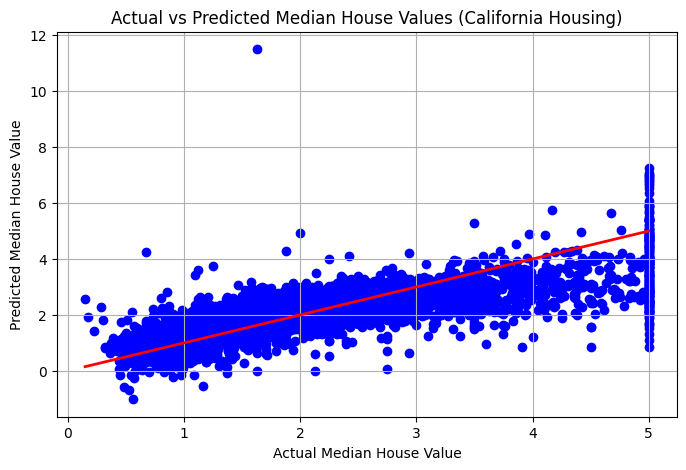

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing # Changed from load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
# boston = load_boston() # Removed
housing = fetch_california_housing() # Added
X = pd.DataFrame(housing.data, columns=housing.feature_names) # Modified to use 'housing'
y = pd.Series(housing.target, name='MedHouseVal') # Modified to use 'housing' and target name

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel("Actual Median House Value") # Modified label
plt.ylabel("Predicted Median House Value") # Modified label
plt.title("Actual vs Predicted Median House Values (California Housing)") # Modified title
plt.grid(True)
plt.show()

In [9]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train k-NN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Encode labels: spam = 1, ham = 0
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# Convert text to feature vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Predict on test data
y_pred = nb.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham', 'spam']))

Accuracy: 0.9919282511210762

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



<ipython-input-11-13a3ea5800ad>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


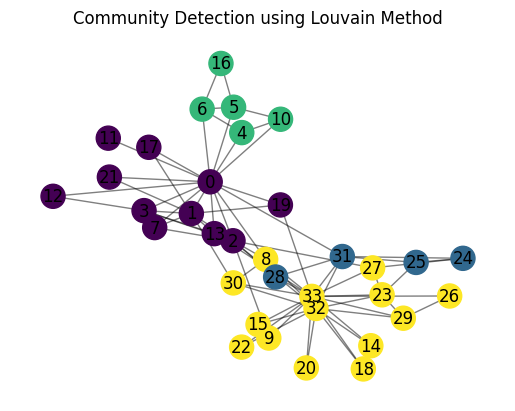

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Step 1: Create a sample graph (Zachary's Karate Club Graph)
G = nx.karate_club_graph()

# Step 2: Apply Louvain method for community detection
partition = community_louvain.best_partition(G)

# Step 3: Visualize the graph with communities
pos = nx.spring_layout(G, seed=42)  # Layout for node positioning

# Draw nodes with community coloring
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(),
                       node_size=300,
                       cmap=cmap,
                       node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

# Display the plot
plt.title("Community Detection using Louvain Method")
plt.axis("off")
plt.show()

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Added to download the missing resource

# Sample text
text = "The movie was absolutely wonderful, with stunning visuals and a thrilling plot. I loved it!"

# 1. Tokenization
tokens = word_tokenize(text)
print("Tokens:", tokens)

# 2. Stop-word Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
print("Filtered Tokens:", filtered_tokens)

# 3. Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print("Stemmed Tokens:", stemmed_tokens)

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("Lemmatized Tokens:", lemmatized_tokens)

# 5. Sentiment Analysis
blob = TextBlob(text)
print("\nSentiment Analysis:")
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokens: ['The', 'movie', 'was', 'absolutely', 'wonderful', ',', 'with', 'stunning', 'visuals', 'and', 'a', 'thrilling', 'plot', '.', 'I', 'loved', 'it', '!']
Filtered Tokens: ['movie', 'absolutely', 'wonderful', 'stunning', 'visuals', 'thrilling', 'plot', 'loved']
Stemmed Tokens: ['movi', 'absolut', 'wonder', 'stun', 'visual', 'thrill', 'plot', 'love']
Lemmatized Tokens: ['movie', 'absolutely', 'wonderful', 'stunning', 'visuals', 'thrilling', 'plot', 'loved']

Sentiment Analysis:
Polarity: 0.65625
Subjectivity: 0.95
